In [114]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [115]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [116]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [117]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt
import pickle

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

#import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
#from matplotlib import reload
import arrow
import gsw
%matplotlib inline

import xarray as xr
from datetime import datetime
from salishsea_tools import grid_tools, viz_tools

from math import log10, floor
import pytz

## pipeline for 5-day retrieval pattern

In [118]:
# days = ['01','06','11','16','21','26']
# mons = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
# tyr = '17'
# tdir = '/data/sallen/results/MEOPAR/fluxes/'
# dir2 = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
# tnam = dir2 + 'hind_insitu_2017.pkl'

# flux_13 = np.zeros([365,898,398])

# tind = 0
# for m in mons:
#     for d in days:
#         if tind%20 == 0:
#             print(tind)
#         tstr = tdir+d+m+tyr+'/'
#         tnc = glob.glob(tstr+'*carp*.nc')
#         w = nc.Dataset(tnc[0])
#         cof = w['co2_flux_mmol_m2_s'][:]
#         scof = (np.shape(cof))[0]
#         flux_13[tind:tind+scof,:,:] = cof
#         tind = tind + scof
        
# #PICKLE code:
# pickle.dump(flux_13, open(tnam, 'wb'))


In [119]:
sec_day = 60*60*24

### co2 flux in mmol/m2/day

In [120]:
hindcast2013_co2_flx = pickle.load(open('../pkls/hind_insitu_2013.pkl', 'rb'))  * sec_day
hindcast2014_co2_flx = pickle.load(open('../pkls/hind_insitu_2014.pkl', 'rb'))  * sec_day
hindcast2015_co2_flx = pickle.load(open('../pkls/hind_insitu_2015.pkl', 'rb'))  * sec_day
hindcast2016_co2_flx = pickle.load(open('../pkls/hind_insitu_2016.pkl', 'rb'))  * sec_day
hindcast2017_co2_flx = pickle.load(open('../pkls/hind_insitu_2017.pkl', 'rb'))  * sec_day

In [121]:
hindcast2013_co2_flx_1d = np.zeros(365)
hindcast2013_co2_flx[hindcast2013_co2_flx>1e10] = 0
hindcast2013_co2_flx[hindcast2013_co2_flx == 0] = np.nan
for i in range(0,365):
    hindcast2013_co2_flx_1d[i] = np.nanmean(hindcast2013_co2_flx[i,:,:])

hindcast2014_co2_flx_1d = np.zeros(365)
hindcast2014_co2_flx[hindcast2014_co2_flx>1e10] = 0
hindcast2014_co2_flx[hindcast2014_co2_flx == 0] = np.nan
for i in range(0,365):
    hindcast2014_co2_flx_1d[i] = np.nanmean(hindcast2014_co2_flx[i,:,:])

hindcast2015_co2_flx_1d = np.zeros(365)
hindcast2015_co2_flx[hindcast2015_co2_flx>1e10] = 0
hindcast2015_co2_flx[hindcast2015_co2_flx == 0] = np.nan
for i in range(0,365):
    hindcast2015_co2_flx_1d[i] = np.nanmean(hindcast2015_co2_flx[i,:,:])

hindcast2016_co2_flx_1d = np.zeros(365)
hindcast2016_co2_flx[hindcast2016_co2_flx>1e10] = 0
hindcast2016_co2_flx[hindcast2016_co2_flx == 0] = np.nan
for i in range(0,365):
    hindcast2016_co2_flx_1d[i] = np.nanmean(hindcast2016_co2_flx[i,:,:])

hindcast2017_co2_flx_1d = np.zeros(365)
hindcast2017_co2_flx[hindcast2017_co2_flx>1e10] = 0
hindcast2017_co2_flx[hindcast2017_co2_flx == 0] = np.nan
for i in range(0,365):
    hindcast2017_co2_flx_1d[i] = np.nanmean(hindcast2017_co2_flx[i,:,:])


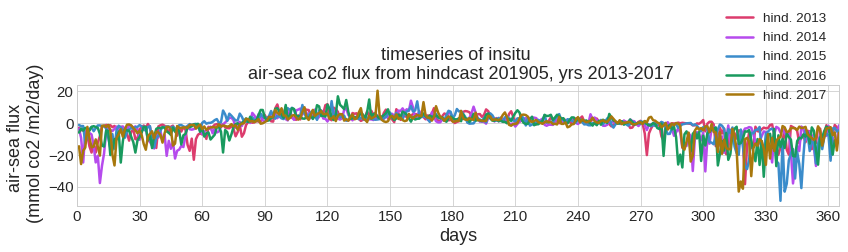

In [122]:

days = np.arange(1,366,1)
tcm = cm.cm.phase

fs = 18
fact = 0.7
fig = plt.figure(figsize=(17*fact,8*fact))
lw = 2.5
ax1 = fig.add_subplot(2,1,1)

#months
ax1.plot(days,hindcast2013_co2_flx_1d, \
         color = tcm(1.*1/5),linewidth = lw, linestyle = '-', label = 'hind. 2013')
ax1.plot(days,hindcast2014_co2_flx_1d, \
         color = tcm(1.*2/5),linewidth = lw, linestyle = '-', label = 'hind. 2014')
ax1.plot(days,hindcast2015_co2_flx_1d, \
         color = tcm(1.*3/5),linewidth = lw, linestyle = '-', label = 'hind. 2015')
ax1.plot(days,hindcast2016_co2_flx_1d, \
         color = tcm(1.*4/5),linewidth = lw, linestyle = '-', label = 'hind. 2016')
ax1.plot(days,hindcast2017_co2_flx_1d, \
         color = tcm(1.*5/5),linewidth = lw, linestyle = '-', label = 'hind. 2017')
ax1.set_ylabel('air-sea flux \n (mmol co2 /m2/day)', fontsize = 18)
ax1.set_title('timeseries of insitu \n air-sea co2 flux from hindcast 201905, yrs 2013-2017', fontsize = 18)
ax1.set_xlim(0,365)
w = ax1.set_xticks(np.arange(0, 365, step=30))



ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.legend(bbox_to_anchor=[1, 1.7], fontsize = fs-4.5)
#ax1.legend(loc = 'best')
w = ax1.set_xticks(np.arange(0, 365, step=30))
ax1.set_xlim(0,365)
#w = ax1.set_yticks(np.arange(0, 110, step=10))
ax1.set_xlabel('days', fontsize = 18)
plt.tight_layout()

In [123]:
pos2013 = np.sort(hindcast2013_co2_flx_1d[hindcast2013_co2_flx_1d>0])[::-1]
neg2013 = np.sort(-1*hindcast2013_co2_flx_1d[hindcast2013_co2_flx_1d<0])[::-1]
pos2014 = np.sort(hindcast2014_co2_flx_1d[hindcast2014_co2_flx_1d>0])[::-1]
neg2014 = np.sort(-1*hindcast2014_co2_flx_1d[hindcast2014_co2_flx_1d<0])[::-1]
pos2015 = np.sort(hindcast2015_co2_flx_1d[hindcast2015_co2_flx_1d>0])[::-1]
neg2015 = np.sort(-1*hindcast2015_co2_flx_1d[hindcast2015_co2_flx_1d<0])[::-1]
pos2016 = np.sort(hindcast2016_co2_flx_1d[hindcast2016_co2_flx_1d>0])[::-1]
neg2016 = np.sort(-1*hindcast2016_co2_flx_1d[hindcast2016_co2_flx_1d<0])[::-1]
pos2017 = np.sort(hindcast2017_co2_flx_1d[hindcast2017_co2_flx_1d>0])[::-1]
neg2017 = np.sort(-1*hindcast2017_co2_flx_1d[hindcast2017_co2_flx_1d<0])[::-1]


pos_prop_2013 = np.zeros(365); neg_prop_2013 = np.zeros(365)
pos_prop_2014 = np.zeros(365); neg_prop_2014 = np.zeros(365)
pos_prop_2015 = np.zeros(365); neg_prop_2015 = np.zeros(365)
pos_prop_2016 = np.zeros(365); neg_prop_2016 = np.zeros(365)
pos_prop_2017 = np.zeros(365); neg_prop_2017 = np.zeros(365)

for i in range(0,365):

    pos_prop_2013[i] = np.sum(pos2013[0:i+1])/np.sum(pos2013)
    neg_prop_2013[i] = np.sum(neg2013[0:i+1])/np.sum(neg2013)
    pos_prop_2014[i] = np.sum(pos2014[0:i+1])/np.sum(pos2014)
    neg_prop_2014[i] = np.sum(neg2014[0:i+1])/np.sum(neg2014)
    pos_prop_2015[i] = np.sum(pos2015[0:i+1])/np.sum(pos2015)
    neg_prop_2015[i] = np.sum(neg2015[0:i+1])/np.sum(neg2015)
    pos_prop_2016[i] = np.sum(pos2016[0:i+1])/np.sum(pos2016)
    neg_prop_2016[i] = np.sum(neg2016[0:i+1])/np.sum(neg2016)
    pos_prop_2017[i] = np.sum(pos2017[0:i+1])/np.sum(pos2017)
    neg_prop_2017[i] = np.sum(neg2017[0:i+1])/np.sum(neg2017)

## what proportion of days is responsible for >50% ingassing

In [124]:
print('prop of ingassing days resp for >50%ingassing')


w = np.where(pos_prop_2013>.5)
days_pos = np.size(pos2013)
first_day = w[0][0]
print(first_day/days_pos)

w = np.where(pos_prop_2014>.5)
days_pos = np.size(pos2014)
first_day = w[0][0]
print(first_day/days_pos)

w = np.where(pos_prop_2015>.5)
days_pos = np.size(pos2015)
first_day = w[0][0]
print(first_day/days_pos)

w = np.where(pos_prop_2016>.5)
days_pos = np.size(pos2016)
first_day = w[0][0]
print(first_day/days_pos)

w = np.where(pos_prop_2017>.5)
days_pos = np.size(pos2017)
first_day = w[0][0]
print(first_day/days_pos)


print('prop days resp for >50% outgassing')



w = np.where(neg_prop_2013>.5)
days_neg = np.size(neg2013)
first_day = w[0][0]
print(first_day/days_neg)

w = np.where(neg_prop_2014>.5)
days_neg = np.size(neg2014)
first_day = w[0][0]
print(first_day/days_neg)

w = np.where(neg_prop_2015>.5)
days_neg = np.size(neg2015)
first_day = w[0][0]
print(first_day/days_neg)

w = np.where(neg_prop_2016>.5)
days_neg = np.size(neg2016)
first_day = w[0][0]
print(first_day/days_neg)

w = np.where(neg_prop_2017>.5)
days_neg = np.size(neg2017)
first_day = w[0][0]
print(first_day/days_neg)

prop of ingassing days resp for >50%ingassing
0.2388888888888889
0.23204419889502761
0.24083769633507854
0.24157303370786518
0.23728813559322035
prop days resp for >50% outgassing
0.1783783783783784
0.1956521739130435
0.13218390804597702
0.20320855614973263
0.16489361702127658


Text(0, 0.5, 'proportion of total net ingassing')

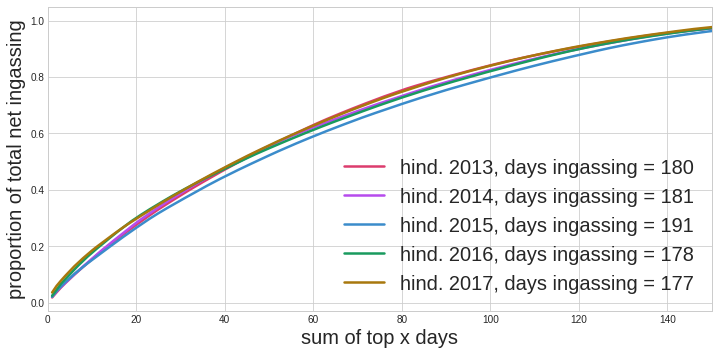

In [125]:
fs = 18
fact = 0.7
fig = plt.figure(figsize=(17*fact,8*fact))
lw = 2.5
ax1 = fig.add_subplot(1,1,1)

#months
ax1.plot(days,pos_prop_2013, color = tcm(1.*1/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2013, days ingassing = '+ str(np.size(pos2013)))
ax1.plot(days,pos_prop_2014, color = tcm(1.*2/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2014, days ingassing = '+ str(np.size(pos2014)))
ax1.plot(days,pos_prop_2015, color = tcm(1.*3/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2015, days ingassing = '+ str(np.size(pos2015)))
ax1.plot(days,pos_prop_2016, color = tcm(1.*4/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2016, days ingassing = '+ str(np.size(pos2016)))
ax1.plot(days,pos_prop_2017,  color = tcm(1.*5/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2017, days ingassing = '+ str(np.size(pos2017)))


ax1.legend(loc = 'best', fontsize = 20)
ax1.set_xlim(0,150)
ax1.set_xlabel('sum of top x days', fontsize = 20)
ax1.set_ylabel('proportion of total net ingassing', fontsize = 20)

Text(0, 0.5, 'proportion of total net outgassing')

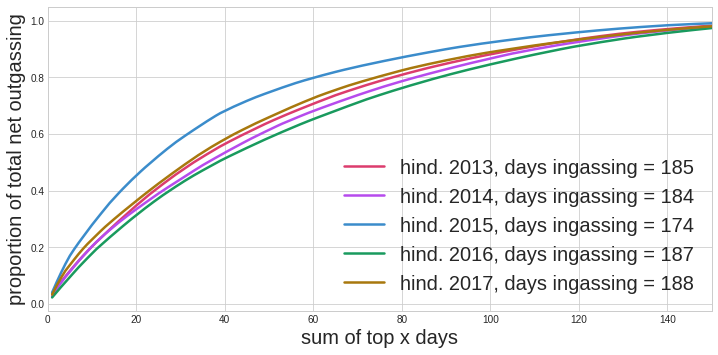

In [126]:
fs = 18
fact = 0.7
fig = plt.figure(figsize=(17*fact,8*fact))
lw = 2.5
ax1 = fig.add_subplot(1,1,1)

#months
ax1.plot(days,neg_prop_2013, color = tcm(1.*1/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2013, days ingassing = '+ str(np.size(neg2013)))
ax1.plot(days,neg_prop_2014, color = tcm(1.*2/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2014, days ingassing = '+ str(np.size(neg2014)))
ax1.plot(days,neg_prop_2015, color = tcm(1.*3/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2015, days ingassing = '+ str(np.size(neg2015)))
ax1.plot(days,neg_prop_2016, color = tcm(1.*4/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2016, days ingassing = '+ str(np.size(neg2016)))
ax1.plot(days,neg_prop_2017,  color = tcm(1.*5/5),linewidth = lw, \
         linestyle = '-', label = 'hind. 2017, days ingassing = '+ str(np.size(neg2017)))


ax1.legend(loc = 'best', fontsize = 20)
ax1.set_xlim(0,150)
ax1.set_xlabel('sum of top x days', fontsize = 20)
ax1.set_ylabel('proportion of total net outgassing', fontsize = 20)

## AS flux in g/m2/yr

In [ ]:
year_2013 = np.nansum(hindcast2013_co2_flx, axis = 0) * 12/1000 # convert mmol/m2/yr to g/m2/yr
year_2013[year_2013 == 0] = np.nan
year_2014 = np.nansum(hindcast2014_co2_flx, axis = 0) * 12/1000 # convert mmol/m2/yr to g/m2/yr
year_2014[year_2014 == 0] = np.nan
year_2015 = np.nansum(hindcast2015_co2_flx, axis = 0) * 12/1000 # convert mmol/m2/yr to g/m2/yr
year_2015[year_2015 == 0] = np.nan
year_2016 = np.nansum(hindcast2016_co2_flx, axis = 0) * 12/1000 # convert mmol/m2/yr to g/m2/yr
year_2016[year_2016 == 0] = np.nan
year_2017 = np.nansum(hindcast2017_co2_flx, axis = 0) * 12/1000 # convert mmol/m2/yr to g/m2/yr
year_2017[year_2017 == 0] = np.nan

In [ ]:
BR_flx = pickle.load(open('../pkls/flux/BR3_flx.pkl', 'rb'))
BR_flx[BR_flx>1e5]=np.nan

#mmol/m2/s > mmol/m2/day
BR_flx_mmol_m2_day = BR_flx * 86400
BR_daily_mean_mmol_m2_day = np.zeros(365)

for i in range(0,365):
    BR_daily_mean_mmol_m2_day[i] = np.nanmean(BR_flx_mmol_m2_day[i,:,:])

BR_flx_mmol_m2_yr = np.sum(BR_flx_mmol_m2_day, axis = 0)
#mmol/yr to g/yr 12.0107 g/mol /1000 for mmol
BR_flx_gC_m2_yr = BR_flx_mmol_m2_yr*12.0107*1e-3
BR_flx_gC_m2_yr[BR_flx_gC_m2_yr>1e6]=np.nan
BR_flx_gC_m2_yr[BR_flx_gC_m2_yr==0]=np.nan
# print('mean BR flux g/m2/yr')
Br3_mean = (np.nanmean(BR_flx_gC_m2_yr))
Br3_std = (np.nanstd(BR_flx_gC_m2_yr))

In [ ]:
hinds_1d = [hindcast2013_co2_flx_1d, hindcast2014_co2_flx_1d, hindcast2015_co2_flx_1d,\
            hindcast2016_co2_flx_1d, hindcast2017_co2_flx_1d]

yrs_2d = [year_2013, year_2014, year_2015, year_2016, year_2017]

yrs_means = np.zeros(5)
yrs_stds = np.zeros(5)
i = 0
for y in yrs_2d:
    yrs_means[i] = (np.nanmean(y))
    yrs_stds[i] = (np.nanstd(y))
    i = i+1

In [ ]:
fs = 14
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)

xs = [2013, 2014, 2015, 2016, 2017]
for i in range(0,len(xs)):
    er1 = ax.errorbar(xs[i], yrs_means[i], yerr=[yrs_stds[i]], marker="o", linestyle="none", color = 'blue')

ax.errorbar(2015, Br3_mean, yerr=[Br3_std], marker="o", linestyle="none", color = 'gold')
ax.axhline(y = 0, color = 'red')

ax.set_xticks(np.arange(2013,2018,1))
ax.set_ylabel('g C / m2 /yr', fontsize = fs)
ax.set_xlabel('year of hindcast', fontsize = fs)
ax.set_title('mean air-sea flux (pos # flux in), gold = BR3', fontsize = fs)

In [ ]:
yrs_stds